## EDA
    ### Univariate Analysis -> columns (distribution), Missing values, Outliers
    ### Pandas Profiling
    ### Multivariate Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('gurgaon_properties_cleaned_v2.csv')

In [3]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,umang winter hills,sector 77,0.86,6408.0,1342.0,Super Built up area 1342(124.68 sq.m.),2,2,2,...,1342.0,NaN,NaN,0,0,0,0,0,1,79
1,flat,pivotal devaan,sector 84,0.41,7032.0,583.0,Super Built up area 583(54.16 sq.m.)Built Up a...,2,2,2,...,583.0,565.0,483.0,0,0,0,0,0,1,23
2,house,dlf city plots,sector 26,17.30,38734.0,4466.0,Plot area 502(419.74 sq.m.),6,7,3+,...,NaN,4518.0,NaN,1,1,1,1,0,1,124
3,house,sector 38 rwa,sector 38,4.30,28782.0,1494.0,Plot area 166(138.8 sq.m.)Built Up area: 165 s...,9,9,3+,...,NaN,165.0,164.0,0,0,0,1,1,1,41
4,house,independent,sector 92,1.80,7627.0,2360.0,Built Up area: 2360 (219.25 sq.m.),4,5,0,...,NaN,2360.0,NaN,0,0,0,0,0,2,0


In [13]:
df.shape

(3803, 23)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3803 entries, 0 to 3802
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_type        3803 non-null   object 
 1   society              3802 non-null   object 
 2   sector               3803 non-null   object 
 3   price                3785 non-null   float64
 4   price_per_sqft       3785 non-null   float64
 5   area                 3785 non-null   float64
 6   areaWithType         3803 non-null   object 
 7   bedRoom              3803 non-null   int64  
 8   bathroom             3803 non-null   int64  
 9   balcony              3803 non-null   object 
 10  floorNum             3784 non-null   float64
 11  facing               2698 non-null   object 
 12  agePossession        3803 non-null   object 
 13  super_built_up_area  1915 non-null   float64
 14  built_up_area        1733 non-null   float64
 15  carpet_area          1944 non-null   f

In [15]:
df.duplicated().sum()

126

In [16]:
df.drop_duplicates(inplace=True) # Biasness will be developed in the model if we keep the duplicates

In [17]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,umang winter hills,sector 77,0.86,6408.0,1342.0,Super Built up area 1342(124.68 sq.m.),2,2,2,...,1342.0,NaN,NaN,0,0,0,0,0,1,79
1,flat,pivotal devaan,sector 84,0.41,7032.0,583.0,Super Built up area 583(54.16 sq.m.)Built Up a...,2,2,2,...,583.0,565.0,483.0,0,0,0,0,0,1,23
2,house,dlf city plots,sector 26,17.30,38734.0,4466.0,Plot area 502(419.74 sq.m.),6,7,3+,...,NaN,4518.0,NaN,1,1,1,1,0,1,124
3,house,sector 38 rwa,sector 38,4.30,28782.0,1494.0,Plot area 166(138.8 sq.m.)Built Up area: 165 s...,9,9,3+,...,NaN,165.0,164.0,0,0,0,1,1,1,41
4,house,independent,sector 92,1.80,7627.0,2360.0,Built Up area: 2360 (219.25 sq.m.),4,5,0,...,NaN,2360.0,NaN,0,0,0,0,0,2,0


## Property Type

'Observation :\n> Majority are flats (75 %) and less number of houses (~25%)\n> '

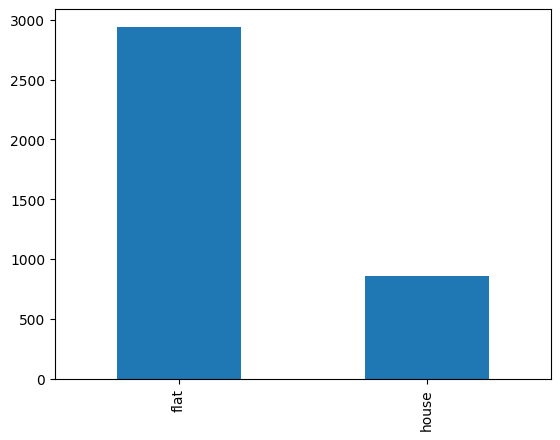

In [5]:
df['property_type'].value_counts().plot(kind = 'bar')

"""Observation :
> Majority are flats (75 %) and less number of houses (~25%)
> """

### Society

In [20]:
df['society'].value_counts().shape  # high cardinality

(676,)

In [21]:
df['society'].value_counts()

independent                             486
tulip violet                             75
ss the leaf                              73
dlf new town heights                     42
shapoorji pallonji joyville gurugram     42
                                       ... 
ramson kshitij sec-95 gurugram            1
city heights                              1
ashok vihar phase 2                       1
landmark the residency                    1
signature signum 95a                      1
Name: society, Length: 676, dtype: int64

In [22]:
df[df['society'] != 'independent']['society'].value_counts(normalize = True).cumsum().head(75)
## Top 75 societies contribute to 50% of the data and rest 600 societies contribute to the rest 50% of the data.

tulip violet                            0.023511
ss the leaf                             0.046395
dlf new town heights                    0.059561
shapoorji pallonji joyville gurugram    0.072727
signature global park                   0.083699
                                          ...   
ats kocoon                              0.490282
umang monsoon breeze                    0.494357
the close north                         0.498433
unitech uniworld resorts                0.502194
ireo the corridors                      0.505956
Name: society, Length: 75, dtype: float64

In [23]:
# Creating bins for society based on the frequency of the flats

society_counts = df['society'].value_counts()

# Frequency distribution for socities
frequency_bins = {
    "Very High (>100)" : (society_counts > 100).sum(),
    "High (50 -100)" : ((society_counts >=50) & (society_counts <= 100)).sum(),
    "Average (10-49)" : ((society_counts >=10) & (society_counts <= 50)).sum(),
    "Low (2-9)": ((society_counts > 1) & (society_counts <= 10)).sum(),
    "Very Low (1)": (society_counts == 1).sum()
}
frequency_bins

{'Very High (>100)': 1,
 'High (50 -100)': 2,
 'Average (10-49)': 92,
 'Low (2-9)': 279,
 'Very Low (1)': 308}

<Axes: >

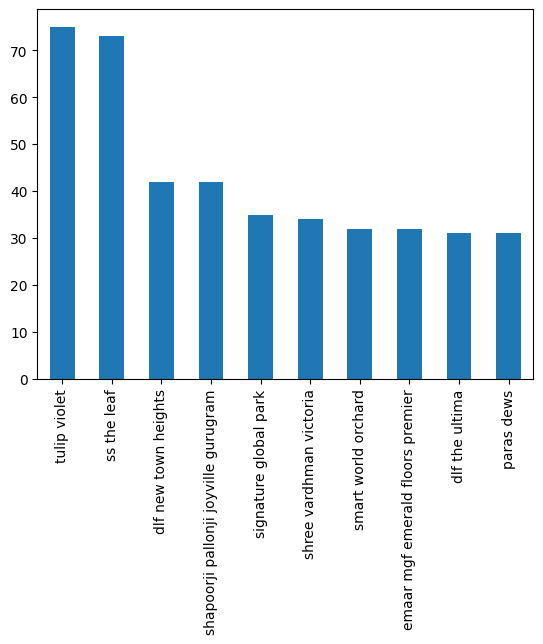

In [25]:
# Plotting the top 10 socities
df[df['society'] != 'independent']['society'].value_counts().head(10).plot(kind = 'bar')

In [26]:
df['society'].isnull().sum()

1

In [29]:
df[df['society'].isnull()]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1626,flat,NaN,sector 78,0.6,3692.0,1625.0,Built Up area: 1625 (150.97 sq.m.),2,2,0,...,NaN,1625.0,NaN,0,0,0,0,0,2,0


In [6]:
## Observations
# 1. Around 13% properties comes under independent tag
# 2. In total there aere 675 societies.
# 3. The top 75 societies have 50 percent of the preperties and the rest 50 percent of the properties come under the remaining 600 societies
"""Very High (>100): Only 1 society has more than 100 listings.
High (50-100): 2 societies have between 50 to 100 listings.
Average (10-49): 92 societies fall in this range with 10 to 49 listings each.
Low (2-9): 273 societies have between 2 to 9 listings.
Very Low (1): A significant number, 308 societies, have only 1 listing."""


'Very High (>100): Only 1 society has more than 100 listings.\nHigh (50-100): 2 societies have between 50 to 100 listings.\nAverage (10-49): 92 societies fall in this range with 10 to 49 listings each.\nLow (2-9): 273 societies have between 2 to 9 listings.\nVery Low (1): A significant number, 308 societies, have only 1 listing.'

## sector

In [31]:
df['sector'].value_counts().shape  # unique sector

(113,)

<Axes: >

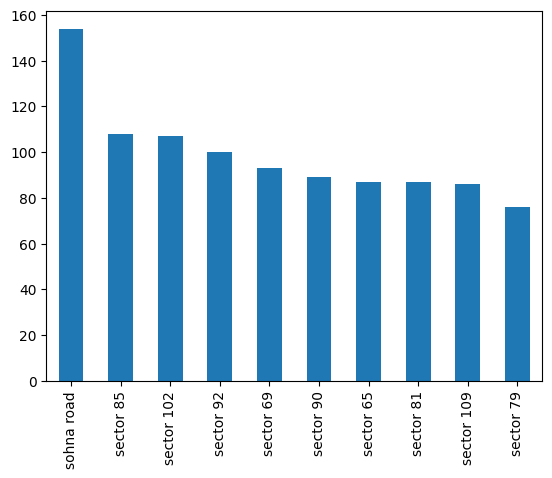

In [32]:
# Plotting the top 10 sectors
df['sector'].value_counts().head(10).plot(kind='bar')

In [33]:
# Frequency distribution for sectors
sector_counts = df['sector'].value_counts()

sector_frequency_bins = {
    "Very High (>100)": (sector_counts > 100).sum(),
    "High (50-100)": ((sector_counts >= 50) & (sector_counts <= 100)).sum(),
    "Average (10-49)": ((sector_counts >= 10) & (sector_counts < 50)).sum(),
    "Low (2-9)": ((sector_counts > 1) & (sector_counts < 10)).sum(),
    "Very Low (1)": (sector_counts == 1).sum()
}

sector_frequency_bins

{'Very High (>100)': 3,
 'High (50-100)': 25,
 'Average (10-49)': 63,
 'Low (2-9)': 21,
 'Very Low (1)': 1}

In [34]:
# Observations
"""Total 113 unique sectors in the dataset
    Frequency distribution of sectors:
        Very High (>100): 3 sectors have more than 100 listings.
        High (50-100): 25 sectors have between 50 to 100 listings.
        Average (10-49): A majority, 63 sectors, fall in this range with 10 to 49 listings each.
        Low (2-9): 21 sectors have between 2 to 9 listings.
        Very Low (1): Interestingly, there are no sectors with only 1 listing."""

'Total 113 unique sectors in the dataset\n    Frequency distribution of sectors:\n        Very High (>100): 3 sectors have more than 100 listings.\n        High (50-100): 25 sectors have between 50 to 100 listings.\n        Average (10-49): A majority, 63 sectors, fall in this range with 10 to 49 listings each.\n        Low (2-9): 21 sectors have between 2 to 9 listings.\n        Very Low (1): Interestingly, there are no sectors with only 1 listing.'

## Price - The target variable (output column)

In [35]:
df['price'].isnull().sum()

17

In [36]:
df['price'].describe()

count    3660.000000
mean        2.533664
std         2.980623
min         0.070000
25%         0.950000
50%         1.520000
75%         2.750000
max        31.500000
Name: price, dtype: float64

<Axes: xlabel='price', ylabel='Count'>

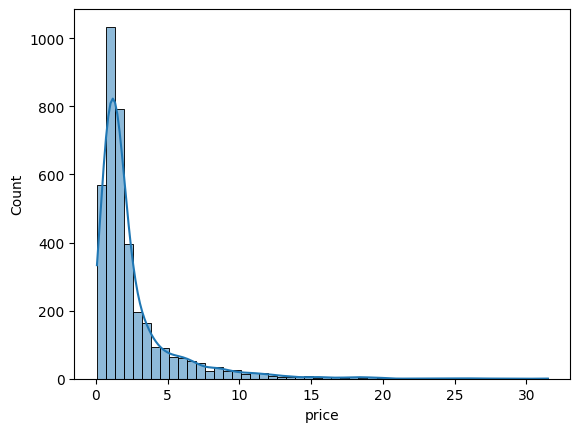

In [8]:
# Plotting histogram to understand the distribution of price
sns.histplot(df['price'], kde=True, bins=50) 
# Skewed data

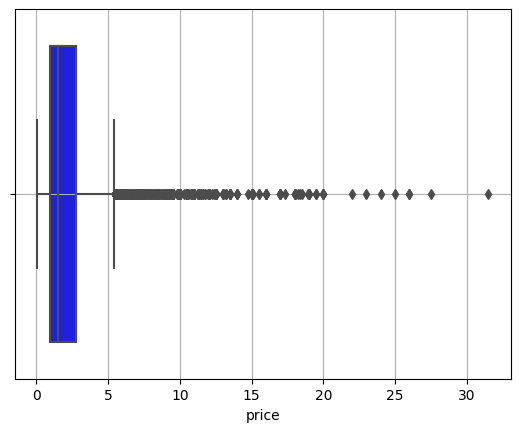

In [41]:
sns.boxplot(x=df['price'], color = 'blue')
plt.grid()

In [42]:
## Descriptive Statistics:
"""
    Count: There are 3,660 non-missing price entries.
    Mean Price: The average price is approximately 2.53 crores.
    Median Price: The median (or 50th percentile) price is 1.52 crores.
    Standard Deviation: The prices have a standard deviation of 2.98, indicating variability in the prices.
    Range: Prices range from a minimum of 0.07 crores to a maximum of 31.5 crores.
    IQR: The interquartile range (difference between 75th and 25th percentile) is from 0.95 crores to 2.75 crores.
"""
##Visualizations:
"""
    Distribution: The histogram indicates that most properties are priced in the lower range (below 5 crores), with a few properties going beyond 10 crores.
    Box Plot: The box plot showcases the spread of the data and potential outliers. Properties priced above approximately 10 crores might be considered outliers as they lie beyond the upper whisker of the box plot.
    Missing Values: There are 17 missing values in the price column.
"""

'\n    Distribution: The histogram indicates that most properties are priced in the lower range (below 5 crores), with a few properties going beyond 10 crores.\n    Box Plot: The box plot showcases the spread of the data and potential outliers. Properties priced above approximately 10 crores might be considered outliers as they lie beyond the upper whisker of the box plot.\n    Missing Values: There are 17 missing values in the price column.\n'

In [43]:
# Skewness and Kurtosis
print("Skewness: %f" % df['price'].skew())
print("Kurtosis: %f" % df['price'].kurt())

Skewness: 3.279170
Kurtosis: 14.933373


### Observations

    #Skewness : 3.27 -> indication a positive skew. This means the distribution tail is skewed towards right which aligns with our observation from the histogram where most properties have prices on the lower end with a few high-priced properties.

    #kurtosis: : 14.93 -> A kurtosis value greater than 3 indicates a distribution with heavier tails and more outliers compared to a normal distribution. 

In [9]:
# Quantile Analysis
quantiles = df['price'].quantile([0.01, 0.05, 0.95, 0.99])

quantiles

0.01     0.250
0.05     0.370
0.95     8.490
0.99    15.016
Name: price, dtype: float64

<h5>Quantile Analysis:

    1% Quantile: Only 1% of properties are priced below 0.25 crores.
    5% Quantile: 5% of properties are priced below 0.37 crores.
    95% Quantile: 95% of properties are priced below 8.5 crores.
    99% Quantile: 99% of properties are priced below 15.26 crores, indicating that very few properties are priced above this value.

In [10]:
# Identify potential outliers using IQR method
Q1 = df['price'].describe()['25%']
Q3 = df['price'].describe()['75%']
IQR = Q3 - Q1

IQR

1.7600000000000002

In [11]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(lower_bound, upper_bound)

-1.7000000000000006 5.340000000000001


In [12]:
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]
outliers.shape
# Lots of outliers, can't remove them. Have to study them carefully

(432, 23)

In [13]:
outliers['price'].describe()

count    432.000000
mean       9.196157
std        4.061291
min        5.350000
25%        6.400000
50%        8.000000
75%       10.607500
max       31.500000
Name: price, dtype: float64

Outliers Analysis (using IQR method):

    Based on the IQR method, there are 425 properties considered as outliers.
    These outliers have an average price of approximately 9.24 crores.
    The range for these outliers is from 5.46 crores to 31.5 crores.

<Axes: >

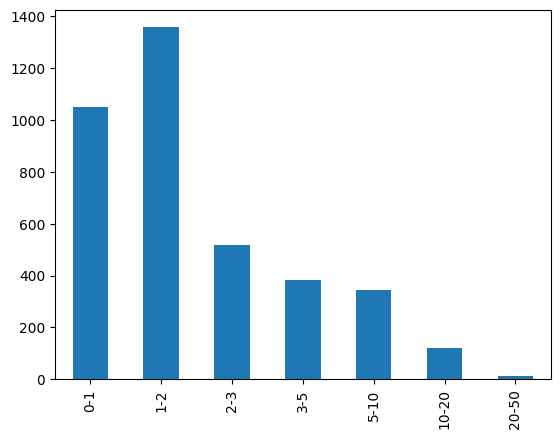

In [14]:
# price binning
bins = [0, 1, 2, 3, 5, 10, 20, 50]
bin_labels = ["0-1", "1-2", "2-3", "3-5", "5-10", "10-20", "20-50"]
pd.cut(df['price'], bins=bins, labels=bin_labels, right=False).value_counts().sort_index().plot(kind='bar')

### Observations
    The majority of properties are priced in the "1-2 crores" and "2-3 crores" ranges.
    There's a significant drop in the number of properties priced above "5 crores."

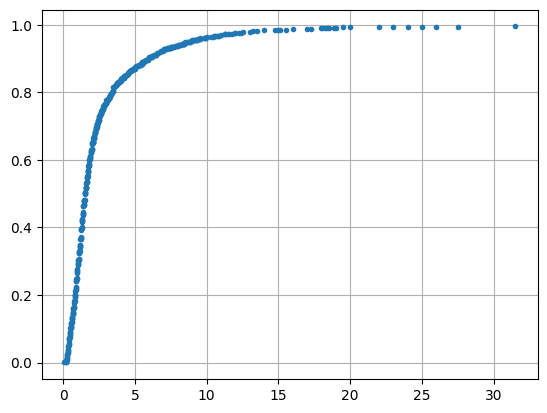

In [16]:
# ecdf plot -> to find the cummalative sum of the price
ecdf = df['price'].value_counts().sort_index().cumsum() / len(df['price'])
plt.plot(ecdf.index, ecdf, marker='.', linestyle='none')
plt.grid()
# Around 80% of the properties are priced below 5 crores.

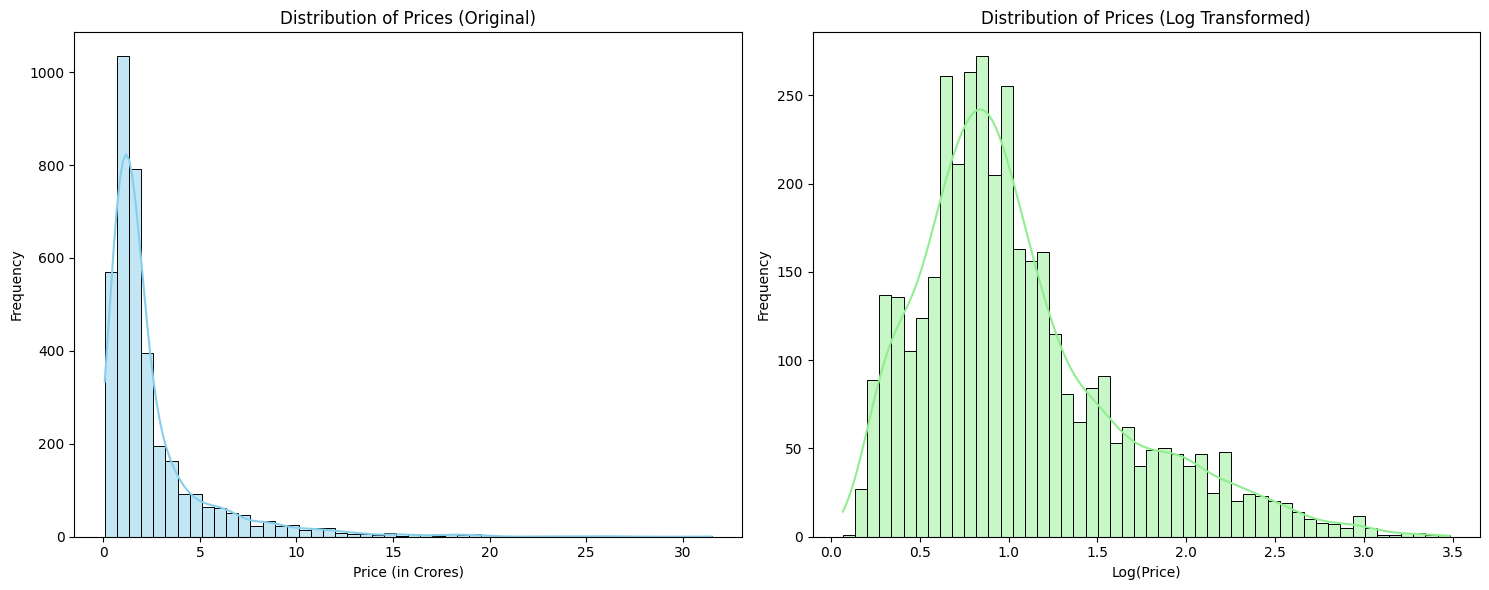

In [17]:
# Since it is a right skewed data, we can take log transformation to make it normal distribution.
plt.figure(figsize=(15, 6))

# Distribution plot without log transformation
plt.subplot(1, 2, 1)
sns.histplot(df['price'], kde=True, bins=50, color='skyblue')
plt.title('Distribution of Prices (Original)')
plt.xlabel('Price (in Crores)')
plt.ylabel('Frequency')

# Distribution plot with log transformation
plt.subplot(1, 2, 2)
sns.histplot(np.log1p(df['price']), kde=True, bins=50, color='lightgreen')
plt.title('Distribution of Prices (Log Transformed)')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

    np.log1p(x): This function computes the natural logarithm of 1+x. It's designed to provide more accurate results for values of x that are very close to zero.

    Using np.log1p helps in transforming the price column while ensuring that any value (including zero, if present) is handled appropriately. When we need to reverse the transformation, we can use np.expm1 which computes e^x-1

In [18]:
skewness = np.log1p(df['price']).skew()
kurtosis = np.log1p(df['price']).kurt()

print(skewness,kurtosis)

1.0830237140465715 1.006599721590867


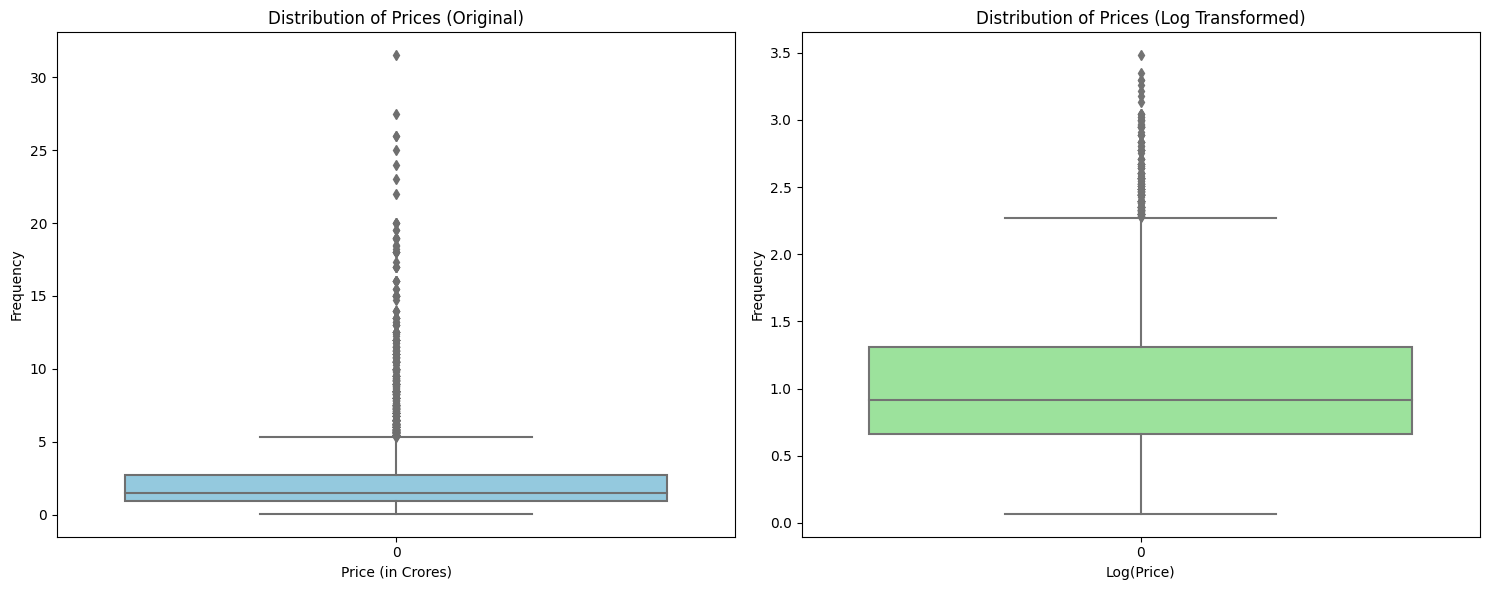

In [19]:
# Same can be done in box plot
plt.figure(figsize=(15, 6))

# Distribution plot without log transformation
plt.subplot(1, 2, 1)
sns.boxplot(df['price'], color='skyblue')
plt.title('Distribution of Prices (Original)')
plt.xlabel('Price (in Crores)')
plt.ylabel('Frequency')

# Distribution plot with log transformation
plt.subplot(1, 2, 2)
sns.boxplot(np.log1p(df['price']), color='lightgreen')
plt.title('Distribution of Prices (Log Transformed)')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### price_per_sqft

In [20]:
df['price_per_sqft'].isnull().sum()

18

In [22]:
df['price_per_sqft'].describe()
# STD is very high, mean data have a lot of variabilty

count      3785.000000
mean      13800.167768
std       23052.005585
min           4.000000
25%        6808.000000
50%        9000.000000
75%       13765.000000
max      600000.000000
Name: price_per_sqft, dtype: float64

<Axes: xlabel='price_per_sqft', ylabel='Count'>

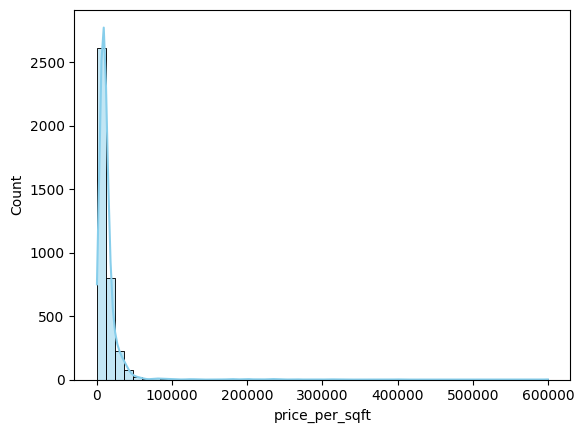

In [23]:
sns.histplot(df['price_per_sqft'], bins=50, color='skyblue', kde=True)
# Right Skewed data

    Most properties have a price_per_sqft ranging between approximately ₹0 and ₹40,000. There is a significant concentration in the lower range, with a few properties having exceptionally high price_per_sqft.

<Axes: >

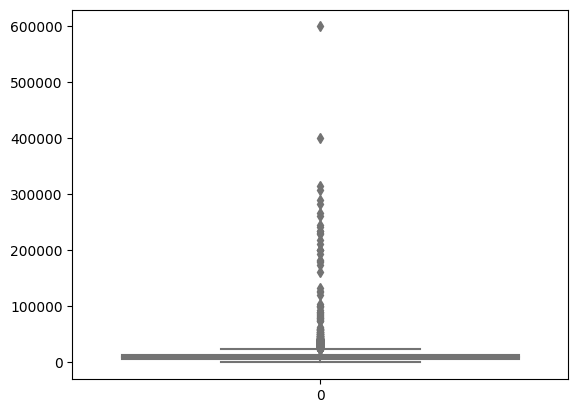

In [24]:
# BOx plot
sns.boxplot(df['price_per_sqft'], color='lightgreen')

    The box plot clearly shows several outliers, especially on the higher side. The interquartile range (IQR) is relatively compact, but there are many data points beyond the "whiskers" of the box plot, indicating potential outliers

### Observations
    Potential Outliers
    Right Skewed
    18 missing values

## bedRoom

In [25]:
df['bedRoom'].isnull().sum()

0

<Axes: >

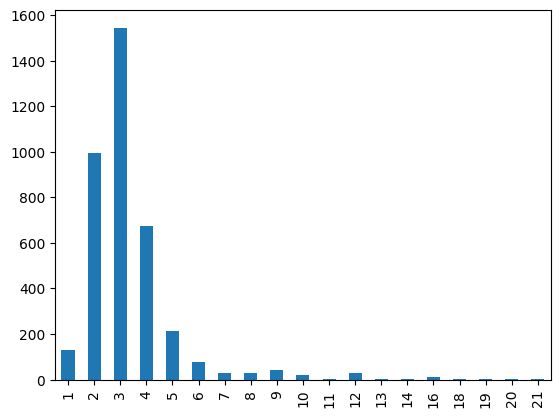

In [26]:
df['bedRoom'].value_counts().sort_index().plot(kind='bar')

<Axes: ylabel='bedRoom'>

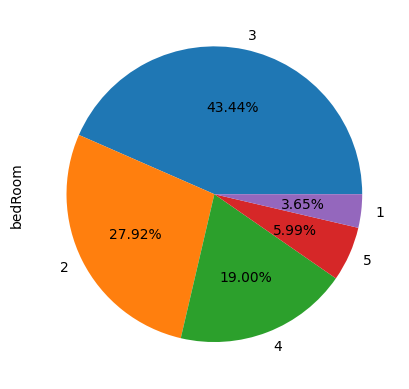

In [27]:
df['bedRoom'].value_counts(normalize=True).head().plot(kind='pie',autopct='%0.2f%%')

## bathRoom

In [28]:
df['bathroom'].isnull().sum()

0

<Axes: >

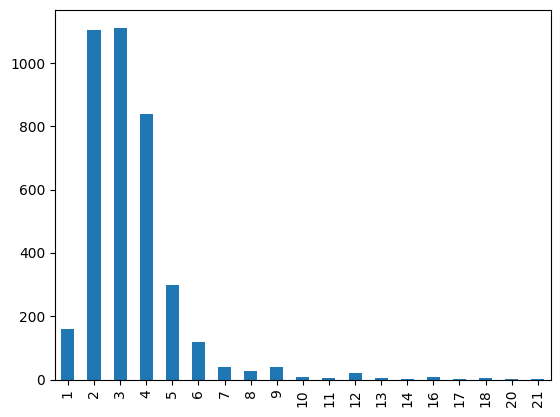

In [29]:
df['bathroom'].value_counts().sort_index().plot(kind='bar')

<Axes: ylabel='bathroom'>

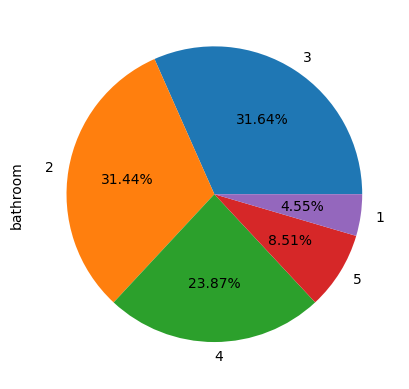

In [32]:
df['bathroom'].value_counts(normalize=True).head().plot(kind='pie',autopct='%0.2f%%')

# bedroom and bath room are highly correlated, so we can use multivariate analysis with them

In [33]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,umang winter hills,sector 77,0.86,6408.0,1342.0,Super Built up area 1342(124.68 sq.m.),2,2,2,...,1342.0,NaN,NaN,0,0,0,0,0,1,79
1,flat,pivotal devaan,sector 84,0.41,7032.0,583.0,Super Built up area 583(54.16 sq.m.)Built Up a...,2,2,2,...,583.0,565.0,483.0,0,0,0,0,0,1,23
2,house,dlf city plots,sector 26,17.30,38734.0,4466.0,Plot area 502(419.74 sq.m.),6,7,3+,...,NaN,4518.0,NaN,1,1,1,1,0,1,124
3,house,sector 38 rwa,sector 38,4.30,28782.0,1494.0,Plot area 166(138.8 sq.m.)Built Up area: 165 s...,9,9,3+,...,NaN,165.0,164.0,0,0,0,1,1,1,41
4,house,independent,sector 92,1.80,7627.0,2360.0,Built Up area: 2360 (219.25 sq.m.),4,5,0,...,NaN,2360.0,NaN,0,0,0,0,0,2,0


## balcony

In [34]:
df['balcony'].isnull().sum()

0

<Axes: >

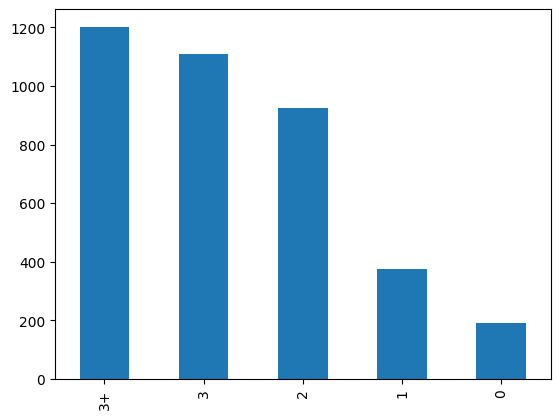

In [35]:
df['balcony'].value_counts().plot(kind='bar')

<Axes: ylabel='balcony'>

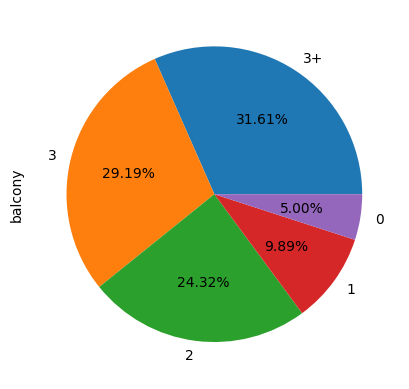

In [36]:
df['balcony'].value_counts(normalize=True).head().plot(kind='pie',autopct='%0.2f%%')

In [37]:
df.iloc[:,10:].head()

,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,16.0,NaN,New Property,1342.0,NaN,NaN,0,0,0,0,0,1,79
1,10.0,East,New Property,583.0,565.0,483.0,0,0,0,0,0,1,23
2,3.0,North,New Property,NaN,4518.0,NaN,1,1,1,1,0,1,124
3,3.0,East,Relatively New,NaN,165.0,164.0,0,0,0,1,1,1,41
4,13.0,NaN,Undefined,NaN,2360.0,NaN,0,0,0,0,0,2,0


## floorNum

In [38]:
df['floorNum'].isnull().sum()

19

In [39]:
df['floorNum'].describe()

count    3784.000000
mean        6.810254
std         6.027555
min         0.000000
25%         2.000000
50%         5.000000
75%        10.000000
max        51.000000
Name: floorNum, dtype: float64

<Axes: >

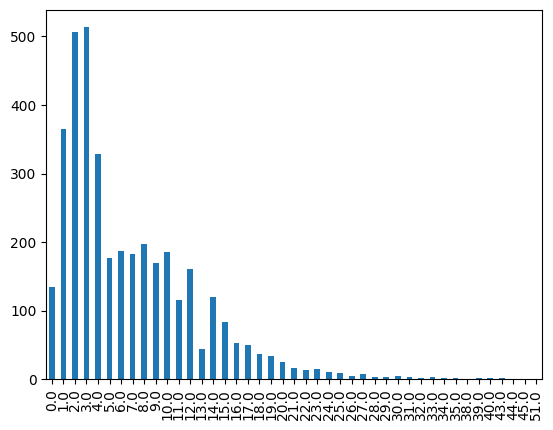

In [40]:
df['floorNum'].value_counts().sort_index().plot(kind='bar')

<Axes: >

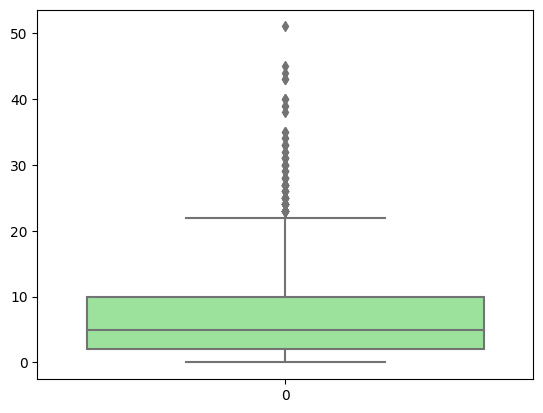

In [41]:
sns.boxplot(df['floorNum'], color='lightgreen')

### Observations
    The majority of the properties lie between the ground floor (0) and the 25th floor.
    Floors 1 to 4 are particularly common, with the 3rd floor being the most frequent.
    There are a few properties located at higher floors, but their frequency is much lower.
    The box plot reveals that the majority of the properties are concentrated around the lower floors. The interquartile range (IQR) lies between approximately the 2nd and 10th floors.
    Data points beyond the "whiskers" of the box plot, especially on the higher side, indicate potential outliers.

## facing 

In [42]:
df['facing'].isnull().sum()

1105

In [43]:
df['facing'].fillna('NA',inplace=True)

In [46]:
df['facing'].value_counts()
# Could be intresting to do bivariatiate analysis with price. Is flats facing east are costlier than flats facing west?

NA            1105
East           642
North-East     639
North          398
West           255
South          233
North-West     200
South-East     174
South-West     157
Name: facing, dtype: int64

## agePossession

In [47]:
df['agePossession'].isnull().sum()

0

In [48]:
df['agePossession'].value_counts()

Relatively New        1676
New Property           626
Moderately Old         575
Undefined              333
Old Property           310
Under Construction     283
Name: agePossession, dtype: int64

## areas
    built_up_area: The total area on which the flat is made.
    carpet area: built_up_area - balcony area - thickness of walls
    super_built_up_area : The extra area outside flats (like common area, stair, lift area)


In [49]:
# Super_built_up_area
df['super_built_up_area'].isnull().sum()

1888

In [50]:
df['super_built_up_area'].describe()

count     1915.000000
mean      1921.658251
std        767.160169
min         89.000000
25%       1457.000000
50%       1828.000000
75%       2215.000000
max      10000.000000
Name: super_built_up_area, dtype: float64

<Axes: xlabel='super_built_up_area', ylabel='Count'>

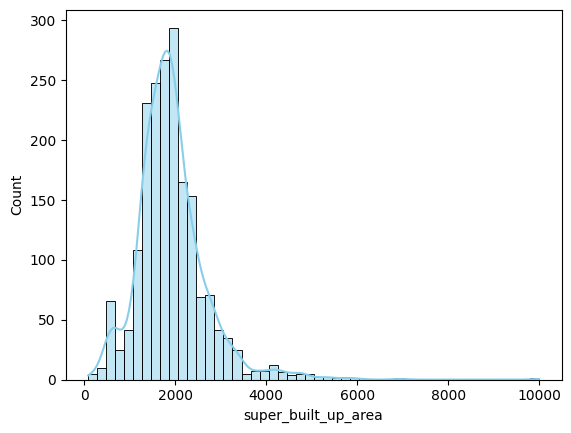

In [51]:
sns.histplot(df['super_built_up_area'], bins=50, color='skyblue', kde=True)

<Axes: >

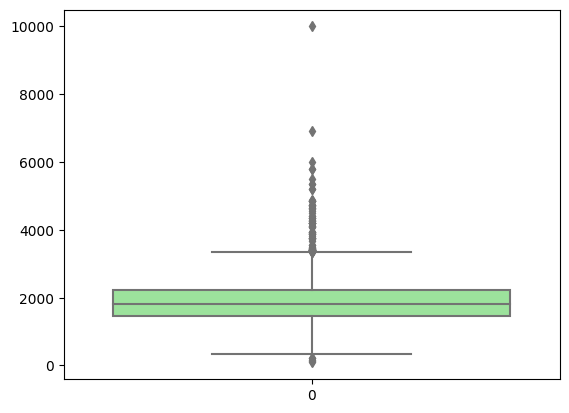

In [62]:
sns.boxplot(df['super_built_up_area'].dropna(), color='lightgreen')

### Observations
    Most properties have a super built-up area ranging between approximately 1,000 sq.ft and 2,500 sq.ft.
    There are a few properties with a significantly larger area, leading to a right-skewed distribution.
    The interquartile range (IQR) lies between roughly 1,480 sq.ft and 2,215 sq.ft, indicating that the middle 50% of the properties fall within this range.
    There are several data points beyond the upper "whisker" of the box plot, indicating potential outliers. These are properties with an unusually large super built-up area.

In [53]:
# built_up_area
df['built_up_area'].isnull().sum()

2070

In [54]:
df['built_up_area'].describe()

count      1733.000000
mean       2360.241413
std       17719.603378
min           2.000000
25%        1100.000000
50%        1650.000000
75%        2399.000000
max      737147.000000
Name: built_up_area, dtype: float64

<Axes: xlabel='built_up_area', ylabel='Count'>

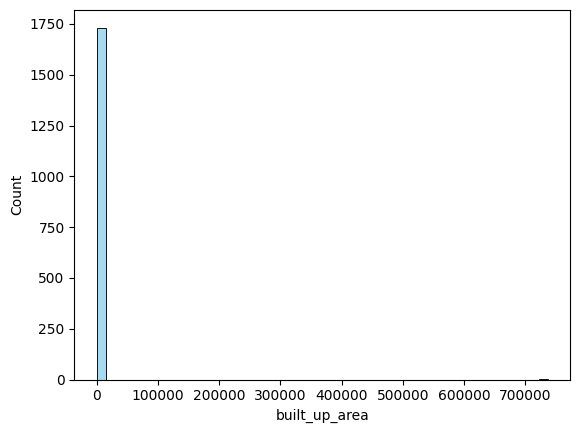

In [55]:
sns.histplot(df['built_up_area'].dropna(), bins=50, color='skyblue', kde=False)

### Observations 
    Most properties have a built-up area ranging roughly between 500 sq.ft and 3,500 sq.ft.
    There are very few properties with a much larger built-up area, leading to a highly right-skewed distribution.
    The box plot confirms the presence of significant outliers on the higher side. The data's interquartile range (IQR) is relatively compact, but the "whiskers" of the box plot are stretched due to the outliers.
    The presence of extreme values, especially on the higher side, suggests that there may be outliers or data errors. This could also be due to some properties being exceptionally large, like a commercial complex or an entire building being listed.

In [58]:
# carpet_area
df['carpet_area'].isnull().sum()

1859

In [59]:
df['carpet_area'].describe()

count      1944.000000
mean       2483.466943
std       22375.239293
min          15.000000
25%         824.000000
50%        1294.000000
75%        1786.250000
max      607936.000000
Name: carpet_area, dtype: float64

<Axes: xlabel='carpet_area', ylabel='Count'>

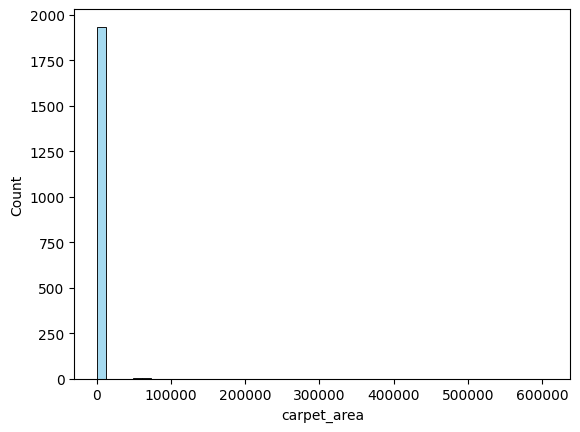

In [60]:
sns.histplot(df['carpet_area'].dropna(), bins=50, color='skyblue', kde=False)

In [63]:
#sns.boxplot(df['carpet_area'].dropna(), color='lightgreen')

In [64]:
## HAve to treat these outliers and handle missing values Imputations 

In [65]:
df.iloc[:,16:]

,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,0,0,0,0,0,1,79
1,0,0,0,0,0,1,23
2,1,1,1,1,0,1,124
3,0,0,0,1,1,1,41
4,0,0,0,0,0,2,0
...,...,...,...,...,...,...,...
3798,0,1,0,0,0,1,150
3799,1,1,0,1,0,1,49
3800,0,0,0,0,0,2,0
3801,0,0,0,0,0,2,150


## additional rooms

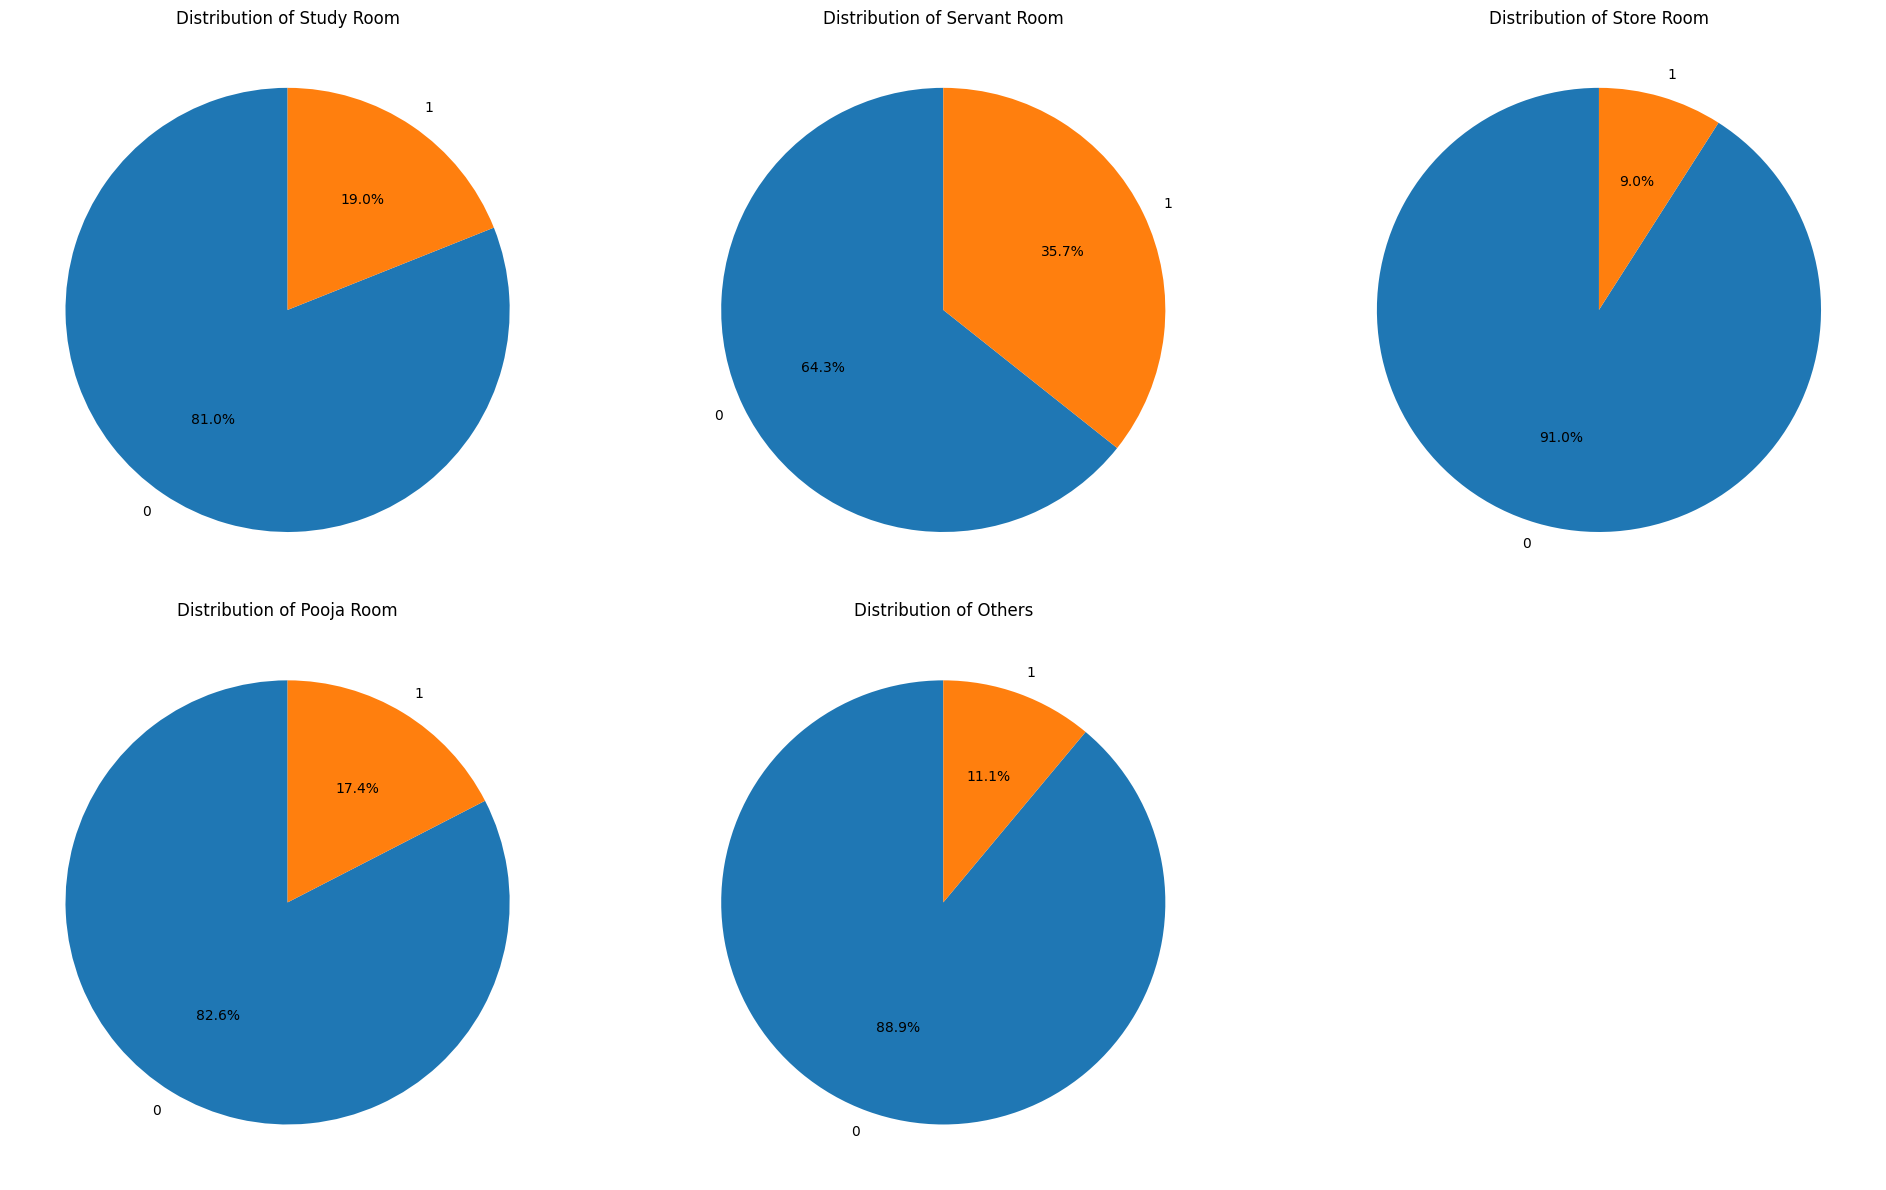

In [66]:
plt.figure(figsize=(20, 12))

# Create a subplot of pie charts for each room type
for idx, room in enumerate(['study room','servant room','store room','pooja room','others'], 1):
    ax = plt.subplot(2, 3, idx)
    df[room].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, ax=ax)
    plt.title(f'Distribution of {room.title()}')
    plt.ylabel('')

plt.tight_layout()
plt.show()

## furnishing_type

In [67]:
df['furnishing_type'].value_counts()

2    2501
1    1081
0     221
Name: furnishing_type, dtype: int64

<Axes: ylabel='furnishing_type'>

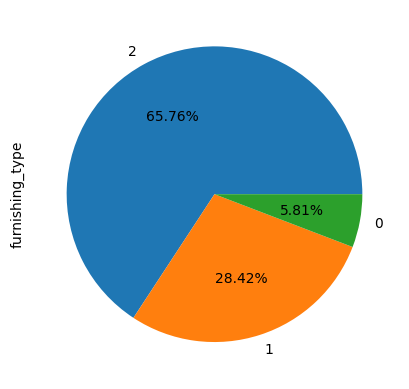

In [68]:
df['furnishing_type'].value_counts().plot(kind='pie',autopct='%0.2f%%')

## luxury score

In [69]:
df['luxury_score'].isnull().sum()

0

In [70]:
df['luxury_score'].describe()

count    3803.000000
mean       70.947936
std        52.821789
min         0.000000
25%        31.000000
50%        58.000000
75%       109.000000
max       174.000000
Name: luxury_score, dtype: float64

<Axes: xlabel='luxury_score', ylabel='Count'>

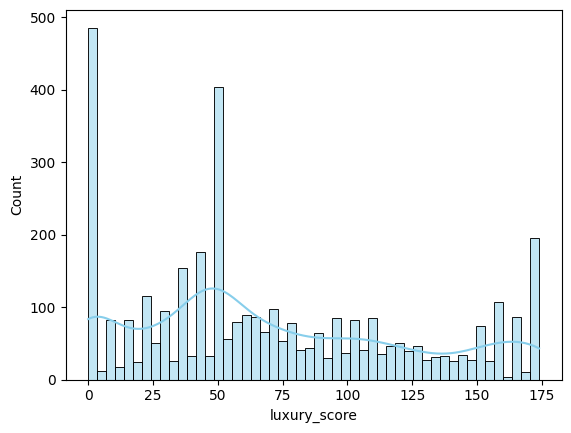

In [71]:
sns.histplot(df['luxury_score'], bins=50, color='skyblue', kde=True)

<Axes: >

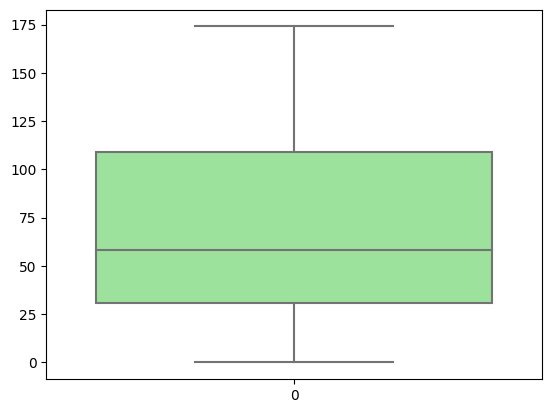

In [72]:
sns.boxplot(df['luxury_score'], color='lightgreen')

    The luxury score distribution has multiple peaks, suggesting a multi-modal distribution. There's a significant number of properties with lower luxury scores (around 0-50), and another peak is observed around the 110-130 range.

    The box plot reveals that the majority of the properties have luxury scores between approximately 30 and 110. The interquartile range (IQR) lies between these values.

In [73]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,umang winter hills,sector 77,0.86,6408.0,1342.0,Super Built up area 1342(124.68 sq.m.),2,2,2,...,1342.0,NaN,NaN,0,0,0,0,0,1,79
1,flat,pivotal devaan,sector 84,0.41,7032.0,583.0,Super Built up area 583(54.16 sq.m.)Built Up a...,2,2,2,...,583.0,565.0,483.0,0,0,0,0,0,1,23
2,house,dlf city plots,sector 26,17.30,38734.0,4466.0,Plot area 502(419.74 sq.m.),6,7,3+,...,NaN,4518.0,NaN,1,1,1,1,0,1,124
3,house,sector 38 rwa,sector 38,4.30,28782.0,1494.0,Plot area 166(138.8 sq.m.)Built Up area: 165 s...,9,9,3+,...,NaN,165.0,164.0,0,0,0,1,1,1,41
4,house,independent,sector 92,1.80,7627.0,2360.0,Built Up area: 2360 (219.25 sq.m.),4,5,0,...,NaN,2360.0,NaN,0,0,0,0,0,2,0
